# A&E testing 1

This script is for some initial testing of the previous A&E data:
<ul>
<li>quick regression analysis</li>
<li>plotting of variables previously made over time</li>
</ul>



In [98]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [10]:
print('hello')

hello


In [11]:
!dir "../../3_Data/3-2_Archive/prev_anal/"

 Volume in drive H is users
 Volume Serial Number is 009A-9A03

 Directory of H:\20170113_AandE\3_Data\3-2_Archive\prev_anal

13/02/2017  15:59    <DIR>          .
13/02/2017  14:03    <DIR>          ..
03/11/2015  15:50         1,067,775 QUARTERLY_data_set_forweb.csv
13/02/2017  14:02    <DIR>          NHSE_dtransfers
03/11/2015  10:11           251,536 quarterly_beddays_night.csv
03/11/2015  10:18             6,427 missing_analysis_27_10_15.csv
03/11/2015  12:25            11,234 metadata_v1.xlsx
17/09/2015  13:34               644 about.txt
09/02/2016  11:47         1,047,291 QUARTERLY_data_set_v1.csv
26/10/2015  12:16             3,333 missing_analysis_21_10_15_v2.csv
13/02/2017  15:26           874,415 quarterly_analysis_v1.ipynb
13/02/2017  14:03    <DIR>          NHSE_beddays
21/10/2015  16:58           204,502 quarterly_beddays_day.csv
13/02/2017  14:03    <DIR>          NHSE_activity(QAR)
22/10/2015  16:47           176,466 quarterly_dtransfers.csv
09/02/2016  11:49         1,

In [12]:
dta = pd.read_csv('../../3_Data/3-2_Archive/prev_anal/QUARTERLY_data_set_v1.csv')

In [13]:
dta.head()

,year,quarter,org_code,v1_4hr_target,v2_adm_ratio,v3_adm_ratio_ED,v4_adm_ratio_other,v5_adm_4hr_target,v6_type1_vs_all_adm_ratio,v7_other_vs_all_adm_ratio,...,v35_nightbed_adm_ratio_ED,v40_days_delay_NHS,v41_days_delay_SCare,v42_days_delay_both,v43_days_delay_sum,v50_elec_adm_gp_prop,v51_elec_adm_vs_decision_to_admit,v52_gp_ref_elec_adm_ratio,v53_ED_elective_adm_ratio,v54_emerg_vs_elective_adm_ratio
0,2010.0,4.0,RA2,0.932494,0.655829,0.571967,0.083862,1.000000,0.645103,0.127872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010.0,4.0,RA3,0.934173,0.259067,0.228001,0.031066,0.999179,0.866878,0.119915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010.0,4.0,RA4,0.948678,0.364295,0.322418,0.041877,1.000000,0.885048,0.114952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.0,4.0,RA7,0.937531,0.666667,0.490251,0.176415,0.976250,0.732560,0.264623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010.0,4.0,RA9,0.987652,0.373792,0.356083,0.017708,0.998947,0.952625,0.047375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Plotting variables over time

In [14]:
dta.shape

(2828, 25)

In [41]:
#dta.groupby(['year','quarter']).median()

In [35]:
dta.columns

Index(['year', 'quarter', 'org_code', 'v1_4hr_target', 'v2_adm_ratio',
       'v3_adm_ratio_ED', 'v4_adm_ratio_other', 'v5_adm_4hr_target',
       'v6_type1_vs_all_adm_ratio', 'v7_other_vs_all_adm_ratio',
       'v30_daybed_occ_perc', 'v31_daybed_adm_ratio',
       'v32_daybed_adm_ratio_ED', 'v33_nightbed_occ_perc',
       'v34_nightbed_adm_ratio', 'v35_nightbed_adm_ratio_ED',
       'v40_days_delay_NHS', 'v41_days_delay_SCare', 'v42_days_delay_both',
       'v43_days_delay_sum', 'v50_elec_adm_gp_prop',
       'v51_elec_adm_vs_decision_to_admit', 'v52_gp_ref_elec_adm_ratio',
       'v53_ED_elective_adm_ratio', 'v54_emerg_vs_elective_adm_ratio'],
      dtype='object')

In [40]:
dta.groupby('year').median()

,quarter,v1_4hr_target,v2_adm_ratio,v3_adm_ratio_ED,v4_adm_ratio_other,v5_adm_4hr_target,v6_type1_vs_all_adm_ratio,v7_other_vs_all_adm_ratio,v30_daybed_occ_perc,v31_daybed_adm_ratio,...,v35_nightbed_adm_ratio_ED,v40_days_delay_NHS,v41_days_delay_SCare,v42_days_delay_both,v43_days_delay_sum,v50_elec_adm_gp_prop,v51_elec_adm_vs_decision_to_admit,v52_gp_ref_elec_adm_ratio,v53_ED_elective_adm_ratio,v54_emerg_vs_elective_adm_ratio
year,,,,,,,,,,,,,,,,,,,,,
2010.0,4.0,0.958870,0.485986,0.325620,0.142890,0.995812,0.689255,0.293065,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011.0,2.5,0.963219,0.443115,0.305637,0.119306,0.997127,0.701646,0.283053,0.914900,186.253217,...,12.020868,11.163805,1.713690,0.0,16.397871,0.626592,0.895568,2.287555,1.226509,1.774814
2012.0,3.0,0.957191,0.451919,0.313491,0.115404,0.995989,0.716683,0.272150,0.911494,203.360403,...,13.525825,12.288197,1.769909,0.0,18.205116,0.627774,0.891065,2.318313,1.353522,1.810469
2013.0,2.5,0.952423,0.474658,0.323700,0.118077,0.994265,0.723190,0.264959,0.915250,192.334099,...,13.511049,13.580956,1.618142,0.0,18.262754,0.633665,0.882236,2.382909,1.356147,1.760087
2014.0,2.5,0.945483,0.478023,0.332294,0.122513,0.991535,0.731916,0.259170,0.911439,193.648791,...,15.107109,16.027793,2.188491,0.0,22.119735,0.644316,0.877314,2.385549,1.340584,1.833702
2015.0,2.0,0.935353,0.498154,0.344650,0.128107,0.990476,0.724211,0.266548,0.903198,189.387058,...,15.526445,16.175452,3.112969,0.0,23.535234,0.643780,0.882066,2.414324,1.307472,1.827635


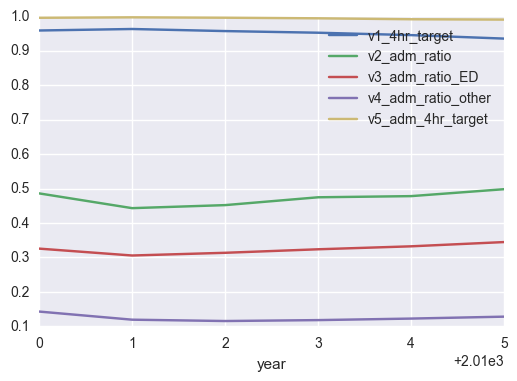

In [37]:
dta.groupby('year').median()[['v1_4hr_target', 'v2_adm_ratio',
       'v3_adm_ratio_ED', 'v4_adm_ratio_other', 'v5_adm_4hr_target']].plot() #(x='year',)

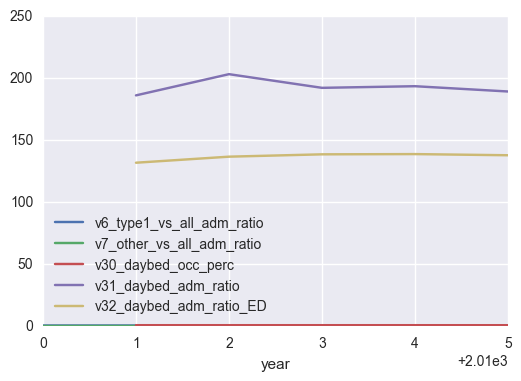

In [44]:
dta.groupby('year').median()[['v6_type1_vs_all_adm_ratio', 'v7_other_vs_all_adm_ratio',
       'v30_daybed_occ_perc', 'v31_daybed_adm_ratio',
       'v32_daybed_adm_ratio_ED']].plot()

### Need to think about making variables a ratio between 0-1 so can compare all at same time?

# First regresion

In [45]:
import statsmodels.formula.api as smf

### Choose data quarter

In [49]:
dta.head()

,year,quarter,org_code,v1_4hr_target,v2_adm_ratio,v3_adm_ratio_ED,v4_adm_ratio_other,v5_adm_4hr_target,v6_type1_vs_all_adm_ratio,v7_other_vs_all_adm_ratio,...,v35_nightbed_adm_ratio_ED,v40_days_delay_NHS,v41_days_delay_SCare,v42_days_delay_both,v43_days_delay_sum,v50_elec_adm_gp_prop,v51_elec_adm_vs_decision_to_admit,v52_gp_ref_elec_adm_ratio,v53_ED_elective_adm_ratio,v54_emerg_vs_elective_adm_ratio
0,2010.0,4.0,RA2,0.932494,0.655829,0.571967,0.083862,1.000000,0.645103,0.127872,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010.0,4.0,RA3,0.934173,0.259067,0.228001,0.031066,0.999179,0.866878,0.119915,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010.0,4.0,RA4,0.948678,0.364295,0.322418,0.041877,1.000000,0.885048,0.114952,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010.0,4.0,RA7,0.937531,0.666667,0.490251,0.176415,0.976250,0.732560,0.264623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010.0,4.0,RA9,0.987652,0.373792,0.356083,0.017708,0.998947,0.952625,0.047375,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### filter by year only

In [73]:

dta[dta['year'] == 2015].shape

(426, 25)

#### FIlter by year and quarter

In [89]:
dta_f = dta[(dta['year'] == 2015) & (dta['quarter'] == 1.0)]

In [90]:
dta_f.head()

,year,quarter,org_code,v1_4hr_target,v2_adm_ratio,v3_adm_ratio_ED,v4_adm_ratio_other,v5_adm_4hr_target,v6_type1_vs_all_adm_ratio,v7_other_vs_all_adm_ratio,...,v35_nightbed_adm_ratio_ED,v40_days_delay_NHS,v41_days_delay_SCare,v42_days_delay_both,v43_days_delay_sum,v50_elec_adm_gp_prop,v51_elec_adm_vs_decision_to_admit,v52_gp_ref_elec_adm_ratio,v53_ED_elective_adm_ratio,v54_emerg_vs_elective_adm_ratio
2402,2015.0,1.0,R1F,0.893617,0.360392,0.294877,0.065514,0.961440,0.818213,0.181787,...,12.853646,32.733333,1.300000,0.000000,34.033333,0.561947,0.717077,5.527251,2.799763,3.421801
2403,2015.0,1.0,R1H,0.882991,0.712652,0.575711,0.136941,0.966786,0.807843,0.192157,...,31.975706,10.367399,2.461896,0.158832,12.988128,0.640793,0.687231,3.810224,3.398008,4.206271
2404,2015.0,1.0,RA2,0.930624,0.758763,0.694490,0.064273,1.000000,0.835388,0.084708,...,22.241245,1.490683,0.082816,1.853002,3.426501,0.649310,0.850401,2.901523,2.073268,2.265143
2405,2015.0,1.0,RA3,0.899657,0.276130,0.249561,0.026569,0.996825,0.903782,0.096218,...,12.006163,23.019231,0.000000,0.000000,23.019231,0.746496,0.797088,1.755361,1.186259,1.312550
2406,2015.0,1.0,RA4,0.941042,0.417259,0.361491,0.055768,0.998178,0.866346,0.133654,...,10.603172,24.705446,15.349010,0.000000,40.054455,0.659911,0.910388,2.173981,1.243574,1.435423


#### choose variable

In [156]:
x_var = 'v30_daybed_occ_perc'
y_var = 'v1_4hr_target'

In [157]:
lm = smf.ols(formula= y_var +' ~ ' + x_var, data=dta_f).fit()

In [158]:
lm.params

Intercept              0.863753
v30_daybed_occ_perc    0.044049
dtype: float64

#### calc values for plot

X_new = pd.DataFrame({x_var: [dta_f[x_var].min(), dta_f[x_var].max()]})
X_new.head()

In [159]:
import patsy

In [164]:
dta_f.sort(x_var,inplace=True)
x = patsy.dmatrix(x_var, data=dta_f) 
preds = lm.predict(x, transform=False)
#preds

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  na_position=na_position)


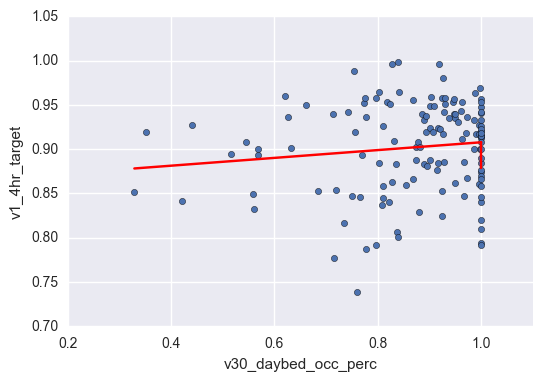

In [165]:
#scatter
dta_f.plot(kind='scatter',x=x_var, y = 'v1_4hr_target')

#regression line
plt.plot(x,preds,c='red')

In [166]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          v1_4hr_target   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     2.146
Date:                Tue, 14 Feb 2017   Prob (F-statistic):              0.145
Time:                        13:48:18   Log-Likelihood:                 214.24
No. Observations:                 137   AIC:                            -424.5
Df Residuals:                     135   BIC:                            -418.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept               0.8638      0.026     32.659      0.000         0.811     0.916
v30_daybed_occ_perc     0.0440      0.030      1.465      0.145        -0.015     0.104
==============================================================================
Omnibus:                        7.731   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.981
Skew:                          -0.591   Prob(JB):                       0.0185
Kurtosis:                       2.958   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Dev

Quarterly data much more variant

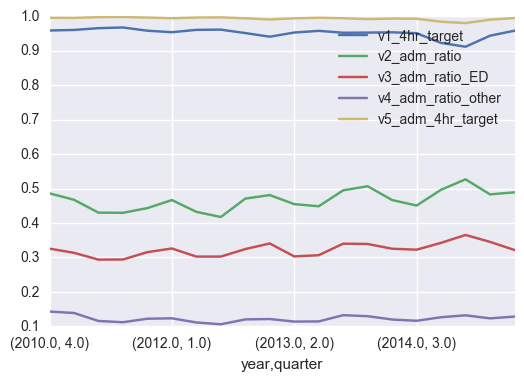

In [38]:
dta.groupby(['year','quarter']).median()[['v1_4hr_target', 'v2_adm_ratio',
       'v3_adm_ratio_ED', 'v4_adm_ratio_other', 'v5_adm_4hr_target']].plot() #(x='year',)